# Chapter 4 - The MA Model

## Listing 4-1. Importing Stock Price data using Yahoo Finance package

In [2]:
!pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=8a3cbde9810451873d3323d6042e35232fbaaea29de84ebf2e42f3dd9f851261
  Stored in directory: c:\users\hansh\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
aws-sam-cli 1.50.0 requires requests==2.25.1, but you have requests 2.27.1 which is incompatible.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [9]:
from pandas_datareader import data as pdr
import yfinance

data = pdr.get_data_yahoo('MSFT', start='2019-01-01', end='2019-12-31')
data = data['Close']


In [10]:
data.head()

Date
2019-01-02    101.120003
2019-01-03     97.400002
2019-01-04    101.930000
2019-01-07    102.059998
2019-01-08    102.800003
Name: Close, dtype: float64

In [6]:
data.resample('Q').mean()

Date
2019-03-31    109.102951
2019-06-30    126.955397
2019-09-30    137.513281
2019-12-31    146.905469
Freq: Q-DEC, Name: Close, dtype: float64

## Listing 4-2. Plotting the Stock Price data 

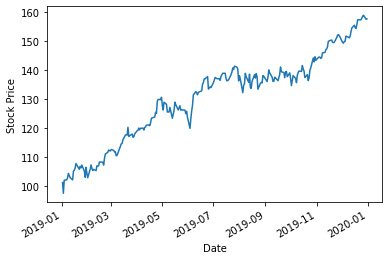

In [4]:
import matplotlib.pyplot as plt
ax = data.plot()
ax.set_ylabel("Stock Price")
plt.show()


## Listing 4-3. Computing the differenced data and plotting it

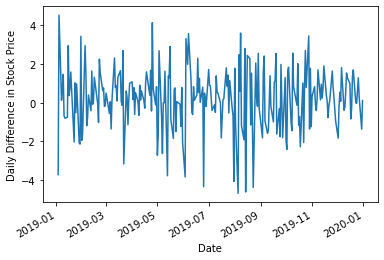

In [5]:
# Need to difference
data = data.diff().dropna()
ax = data.plot()
ax.set_ylabel("Daily Difference in Stock Price")
plt.show()


## Listing 4-4. Applying an ADF test to the differenced data 

In [6]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
pvalue = result[1]
if pvalue < 0.05:
    print('stationary')
else:
    print('not stationary')


stationary


## Listing 4-5. Plotting the Autocorrelation Function and the Partial Autocorrelation Function

C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


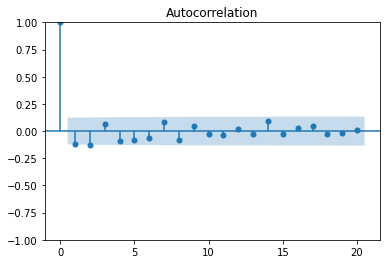

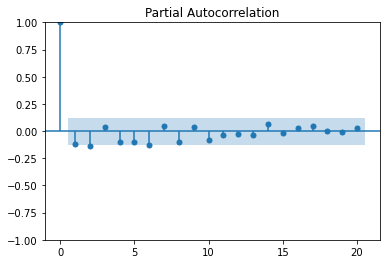

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data, lags=20)
plot_pacf(data, lags=20)
plt.show()


## Listing 4-6. Fitting the MA model and plotting the forecast

C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


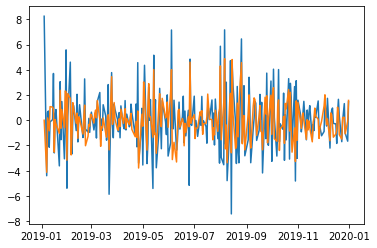

0.5149403733129994


In [8]:
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

# Forecast the first MA(1) model
mod = ARIMA(data.diff().dropna(), order=(0,0,1))
res = mod.fit()

orig_data = data.diff().dropna()
pred = res.predict()

plt.plot(orig_data)
plt.plot(pred)
plt.show()

print(r2_score(orig_data, pred))


## Listing 4-7. Fitting the MA model on train data and evaluation the R2 score on train and test data

In [11]:
train = data.diff().dropna()[0:240]
test = data.diff().dropna()[240:250]

# Forecast the first MA(1) model
mod = ARIMA(train, order=(0,0,1))
res = mod.fit()

pred = res.predict()
fcst = res.forecast(steps = len(test))

print(r2_score(train, pred))
print(r2_score(test, fcst))


C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0.5152180858238123
0.13039026178373903


C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [15]:
mod2=mod = ARIMA(train, order=(0,0,10))
res2 = mod2.fit()
pred2 = res2.predict()
fcst2 = res2.forecast(steps = len(test))

print(r2_score(train, pred2))
print(r2_score(test, fcst2))

C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0.5480201160644506
0.08094525590803314


C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


240   -0.798861
dtype: float64

## Listing 4-8. Plotting the out of sample forecast of the MA(1) model (MA with order 1)

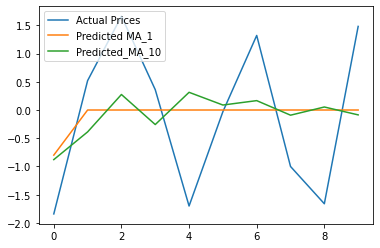

In [17]:
plt.plot(list(test))
plt.plot(list(fcst))
plt.plot(list(fcst2))
plt.legend(['Actual Prices', 'Predicted MA_1',"Predicted_MA_10"])
plt.show()


## Listing 4-9. Estimating the error of the MA(1) model for 10 refitted one-step forecasts

C:\Users\hansh\AppData\Local\Temp/ipykernel_4424/4193230190.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(pd.Series(test[step]))
C:\Users\hansh\AppData\Local\Temp/ipykernel_4424/4193230190.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(pd.Series(test[step]))
C:\Users\hansh\AppData\Local\Temp/ipykernel_4424/4193230190.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(pd.Series(test[step]))
C:\Users\hansh\AppData\Local\Temp/ipykernel_4424/4193230190.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(pd.Series(test[step]))
C:\Users\han

0.48336002881337814


C:\Users\hansh\AppData\Local\Temp/ipykernel_4424/4193230190.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(pd.Series(test[step]))


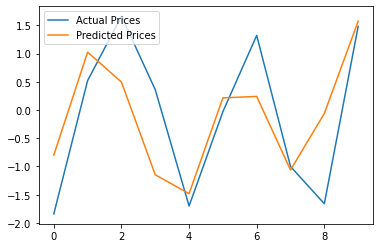

In [18]:
import pandas as pd
train = data.diff().dropna()[0:240]
test = data.diff().dropna()[240:250]

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA
fcst = []
for step in range(len(test)):
    # Forecast the first MA(1) model
    mod = ARIMA(train.reset_index(drop=True), order=(0,0,1))
    res = mod.fit()
    orig_data = data.diff().dropna()
    pred = res.predict()
    fcst += list(res.forecast(steps = 1))
    train = train.append(pd.Series(test[step]))
print(r2_score(list(test), fcst))
plt.plot(list(test))
plt.plot(fcst)
plt.legend(['Actual Prices', 'Predicted Prices'])
plt.show()


## Listing 4-10. Grid search to obtain the MA order that optimizes forecasting R2

In [19]:
def evaluate2(order):
    train = data.diff().dropna()[0:240]
    test = data.diff().dropna()[240:250]
    
    fcst = []
    for step in range(len(test)):
        # Forecast the first MA(1) model
        mod = ARIMA(train.reset_index(drop=True), order=(0,0,order))
        res = mod.fit()
        orig_data = data.diff().dropna()
        pred = res.predict()
        fcst += list(res.forecast(steps = 1))
        train = train.append(pd.Series(test[step]))

    return r2_score(list(test), fcst)

scores = []
for i in range(1, 21):
    scores.append((i, evaluate2(i)))
    
# observe best order is 4 with R2 of 0.566
scores = pd.DataFrame(scores)
print(scores[scores[1] == scores.max()[1]])


C:\Users\hansh\AppData\Local\Temp/ipykernel_4424/1439483157.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(pd.Series(test[step]))
C:\Users\hansh\AppData\Local\Temp/ipykernel_4424/1439483157.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(pd.Series(test[step]))
C:\Users\hansh\AppData\Local\Temp/ipykernel_4424/1439483157.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(pd.Series(test[step]))
C:\Users\hansh\AppData\Local\Temp/ipykernel_4424/1439483157.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(pd.Series(test[step]))
C:\Users\han

   0         1
3  4  0.566758


C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hansh\AppData\Local\Temp/ipykernel_4424/1439483157.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(pd.Series(test[step]))


## Listing 4-11. Obtaining the final forecast

C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hansh\AppData\Local\Temp/ipykernel_4424/2799766843.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(pd.Series(test[step]))
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hansh\AppData\Local\Temp/ipykernel_4424/2799766843.

0.5667584359679938


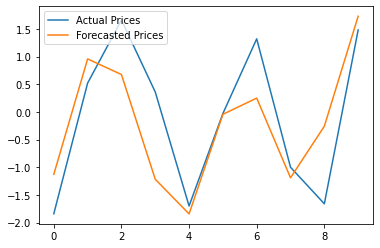

In [20]:
train = data.diff().dropna()[0:240]
test = data.diff().dropna()[240:250]

fcst = []
for step in range(len(test)):
    # Forecast the first MA(1) model
    mod = ARIMA(train.reset_index(drop=True), order=(0,0,4))
    res = mod.fit()


    orig_data = data.diff().dropna()
    pred = res.predict()

    fcst += list(res.forecast(steps = 1))

    train = train.append(pd.Series(test[step]))

print(r2_score(list(test), fcst))

plt.plot(list(test))
plt.plot(fcst)
plt.legend(['Actual Prices', 'Forecasted Prices'])
plt.show()
